In [1]:
import nltk

C:\Users\srija\Anaconda3\lib\site-packages\sklearn\utils\__init__.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Sequence
C:\Users\srija\Anaconda3\lib\site-packages\sklearn\feature_extraction\dict_vectorizer.py:6: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Mapping
C:\Users\srija\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:18: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable


In [3]:
nltk.download_shell()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> l

Packages:
  [ ] abc................. Australian Broadcasting Commission 2006
  [ ] alpino.............. Alpino Dutch Treebank
  [ ] averaged_perceptron_tagger Averaged Perceptron Tagger
  [ ] averaged_perceptron_tagger_ru Averaged Perceptron Tagger (Russian)
  [ ] basque_grammars..... Grammars for Basque
  [ ] biocreative_ppi..... BioCreAtIvE (Critical Assessment of Information
                           Extraction Systems in Biology)
  [ ] bllip_wsj_no_aux.... BLLIP Parser: WSJ Model
  [ ] book_grammars....... Grammars from NLTK Book
  [ ] brown............... Brown Corpus
  [ ] brown_tei........... Brown Corpus (TEI XML Version)
  [ ] cess_cat............ CESS-CAT Treebank
  [ ] cess_esp............ CESS-ESP Treebank
  [ ] chat80.....

        C:\Users\srija\AppData\Roaming\nltk_data...
      Package stopwords is already up-to-date!



---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


In [4]:
messages = [line.rstrip() for line in open('smsspamcollection/SMSSpamCollection')]

In [5]:
print("Total messages in our dataset: ",len(messages))

Total messages in our dataset:  5574


In [6]:
messages[1]

'ham\tOk lar... Joking wif u oni...'

In [8]:
for mess_no, mess in enumerate(messages[:10]):
    print(mess_no, mess)
    print('\n')

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


1 ham	Ok lar... Joking wif u oni...


2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


3 ham	U dun say so early hor... U c already then say...


4 ham	Nah I don't think he goes to usf, he lives around here though


5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, Â£1.50 to rcv


6 ham	Even my brother is not like to speak with me. They treat me like aids patent.


7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune


8 spam	WINNER!! As a valued network customer you have been selected to receivea Â£900 prize reward! To claim call 09061701461. Claim cod

In [9]:
import pandas as pd

In [10]:
messages = pd.read_csv('smsspamcollection/SMSSpamCollection', sep='\t', names=['label','message'])

In [11]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [12]:
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
messages.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [14]:
messages.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [15]:
messages['length'] = messages['message'].apply(len)

In [16]:
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [17]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

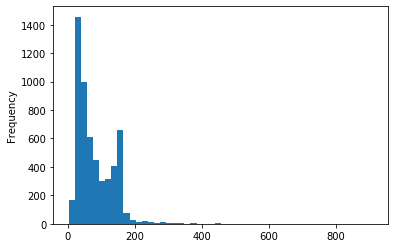

In [20]:
messages['length'].plot.hist(bins=50)

In [21]:
messages['length'].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [22]:
messages[messages['length']==2]

,label,message,length
1925,ham,Ok,2
3051,ham,Ok,2
4498,ham,Ok,2
5357,ham,Ok,2


In [25]:
messages[messages['length']==910]['message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000017A9D4B8C88>,
      dtype=object)

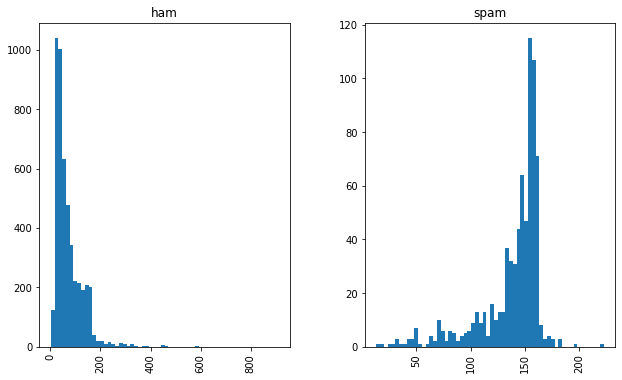

In [27]:
messages.hist(column='length', by = 'label', bins=60, figsize=(10,6))

In [28]:
import string

In [29]:
mess = 'Sample Messages recieved! on it will check : data. '

In [30]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [31]:
nopunc = [c for c in mess if c not in string.punctuation]

In [32]:
nopunc

['S',
 'a',
 'm',
 'p',
 'l',
 'e',
 ' ',
 'M',
 'e',
 's',
 's',
 'a',
 'g',
 'e',
 's',
 ' ',
 'r',
 'e',
 'c',
 'i',
 'e',
 'v',
 'e',
 'd',
 ' ',
 'o',
 'n',
 ' ',
 'i',
 't',
 ' ',
 'w',
 'i',
 'l',
 'l',
 ' ',
 'c',
 'h',
 'e',
 'c',
 'k',
 ' ',
 ' ',
 'd',
 'a',
 't',
 'a',
 ' ']

In [33]:
from nltk.corpus import stopwords

In [34]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [35]:
nopunc = ''.join(nopunc)

In [36]:
nopunc

'Sample Messages recieved on it will check  data '

In [37]:
nopunc.split()

['Sample', 'Messages', 'recieved', 'on', 'it', 'will', 'check', 'data']

In [40]:
clean_mess = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [41]:
clean_mess

['Sample', 'Messages', 'recieved', 'check', 'data']

In [42]:
def text_processing(mess):
    """
    1. remove punctuations
    2. remove stopwords
    3. return list of clean words
    """
    nopunc = [c for c in mess if c not in string.punctuation]
    nopunc = ''.join(nopunc)
    clean_mess = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
    return clean_mess

In [44]:
messages['message'].head(5).apply(text_processing)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

In [45]:
"""
VECTORIZATION
1. Count how many times the word occur in each documents. TF
2. weight the count so that frequency token gets lower weight ITF
3. normalize it to unit length, to abstract length of original text form L2 NORM
"""
from sklearn.feature_extraction.text import CountVectorizer

In [46]:
cv = CountVectorizer(analyzer = text_processing).fit(messages['message'])###bag of word transform

In [47]:
print(len(cv.vocabulary_))

11425


In [48]:
print(messages['message'][3])

U dun say so early hor... U c already then say...


In [51]:
mess3 = messages['message'][3]

In [52]:
bow4 = cv.transform([mess3])

In [53]:
print(bow4)

  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2


In [54]:
print(bow4.shape)

(1, 11425)


In [55]:
cv.get_feature_names()[4068]

'U'

In [56]:
cv.get_feature_names()[7186]

'hor'

In [57]:
mess_bow = cv.transform(messages['message'])

In [59]:
print(mess_bow.shape)

(5572, 11425)


In [60]:
print(mess_bow.nnz)

50548


In [63]:
sparsity = (100.0* mess_bow.nnz / (mess_bow.shape[0] * mess_bow.shape[1]))
print('sparsity is: {}'.format(sparsity))

sparsity is: 0.07940295412668218


In [64]:
from sklearn.feature_extraction.text import  TfidfTransformer

In [65]:
tfid_bow = TfidfTransformer().fit(mess_bow)

In [67]:
tfid_bow

TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True)

In [68]:
tfid3 = tfid_bow.transform(bow4)

In [69]:
print(tfid3)

  (0, 9554)	0.5385626262927564
  (0, 7186)	0.4389365653379857
  (0, 6222)	0.3187216892949149
  (0, 6204)	0.29953799723697416
  (0, 5261)	0.29729957405868723
  (0, 4629)	0.26619801906087187
  (0, 4068)	0.40832589933384067


In [74]:
tfid_bow.idf_[cv.vocabulary_['university']]

8.527076498901426

In [75]:
mess_tfid_bow = tfid_bow.transform(mess_bow)

In [76]:
from sklearn.naive_bayes import MultinomialNB

In [77]:
spam_detect_model = MultinomialNB().fit(mess_tfid_bow, messages['label'])

In [80]:
spam_detect_model.predict(tfid3)[0]

'ham'

In [81]:
all_pred = spam_detect_model.predict(mess_tfid_bow)

In [82]:
all_pred

array(['ham', 'ham', 'spam', ..., 'ham', 'ham', 'ham'], dtype='<U4')

In [83]:
from sklearn.model_selection import train_test_split

In [84]:
mess_train, mess_test, label_train, label_test = train_test_split(messages['message'], messages['label'], test_size=0.3)

In [85]:
from sklearn.pipeline import Pipeline

In [86]:
pipeline = Pipeline([
                ('bow',CountVectorizer(analyzer=text_processing)),
                ('tfidf',TfidfTransformer()),
                ('classifier',MultinomialNB())
                ])

In [87]:
pipeline.fit(mess_train, label_train)

Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer=<function text_processing at 0x0000017A9DEE31F8>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preproce...f=False, use_idf=True)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [88]:
predicts = pipeline.predict(mess_test)

In [89]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [90]:
print("Accuracy score is : ", accuracy_score(predicts,label_test))
print("Confusion matrix is : ", confusion_matrix(predicts, label_test))
print("Classification report is : ", classification_report(predicts, label_test))

Accuracy score is :  0.9647129186602871
Confusion matrix is :  [[1457   59]
 [   0  156]]
Classification report is :               precision    recall  f1-score   support

        ham       1.00      0.96      0.98      1516
       spam       0.73      1.00      0.84       156

avg / total       0.97      0.96      0.97      1672



In [91]:
from sklearn.ensemble import RandomForestClassifier
pipeline1 = Pipeline([
                ('bow',CountVectorizer(analyzer=text_processing)),
                ('tfidf',TfidfTransformer()),
                ('classifier',RandomForestClassifier())
                ])

In [92]:
pipeline1.fit(mess_train, label_train)

Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer=<function text_processing at 0x0000017A9DEE31F8>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preproce...n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))])

In [93]:
predict1 = pipeline1.predict(mess_test)

In [94]:
print("Accuracy score is : ", accuracy_score(predict1,label_test))
print("Confusion matrix is : ", confusion_matrix(predict1, label_test))
print("Classification report is : ", classification_report(predict1, label_test))

Accuracy score is :  0.9659090909090909
Confusion matrix is :  [[1455   55]
 [   2  160]]
Classification report is :               precision    recall  f1-score   support

        ham       1.00      0.96      0.98      1510
       spam       0.74      0.99      0.85       162

avg / total       0.97      0.97      0.97      1672

